In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

import json
import git
from collections import defaultdict
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
path = Path(".")
if not path.joinpath("cf-action-counter-db").is_dir():
    !git clone https://github.com/regro/cf-action-counter-db

In [4]:
keys = ['appveyor', 'azure-pipelines', 'circleci', 'drone', 'github-actions', 'travis-ci']

In [5]:
totals = defaultdict(dict)

In [6]:
repo = git.Repo('cf-action-counter-db')
ggit = repo.git
for commit in tqdm(repo.iter_commits(rev='master')):
    ggit.checkout(commit)
    if os.path.exists('cf-action-counter-db/data/latest.json'):
        with open('cf-action-counter-db/data/latest.json', 'r') as f:
            data = json.load(f)
        for k in keys:
            if k in data and 'rates' in data[k]:
                totals[k].update(data[k]['rates'])

In [7]:
len(totals['azure-pipelines'])

31022

In [8]:
df = pd.DataFrame(totals)
df.index = pd.to_datetime(df.index)

In [9]:
df.head()

,appveyor,azure-pipelines,circleci,drone,github-actions,travis-ci
2020-05-16 08:50:00-04:00,0.0,4,1.0,0.0,1,1
2020-05-16 08:55:00-04:00,0.0,12,0.0,0.0,4,0
2020-05-16 09:00:00-04:00,0.0,0,0.0,0.0,0,0
2020-05-16 09:05:00-04:00,0.0,6,0.0,0.0,1,0
2020-05-16 09:10:00-04:00,0.0,19,0.0,0.0,5,1


In [11]:
df.index = pd.to_datetime(df.index, utc=True)

In [12]:
df.index = pd.DatetimeIndex(df.index)

In [13]:
df3 = df.resample('D').sum()

In [14]:
df3.head()

,appveyor,azure-pipelines,circleci,drone,github-actions,travis-ci
2020-01-29 00:00:00+00:00,0.0,55,0.0,0.0,0,1
2020-01-30 00:00:00+00:00,0.0,1847,0.0,0.0,90,83
2020-01-31 00:00:00+00:00,0.0,1902,0.0,0.0,5,48
2020-02-01 00:00:00+00:00,0.0,722,0.0,0.0,17,55
2020-02-02 00:00:00+00:00,0.0,708,0.0,0.0,2,37


In [15]:
df3.sum()

appveyor             2286.0
azure-pipelines    173693.0
circleci             2929.0
drone                2632.0
github-actions      55842.0
travis-ci            5038.0
dtype: float64

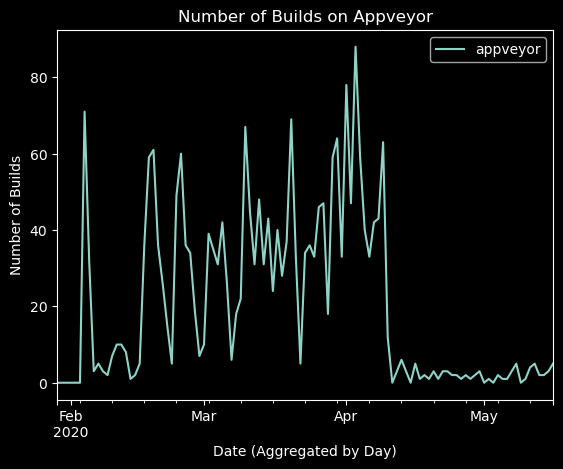

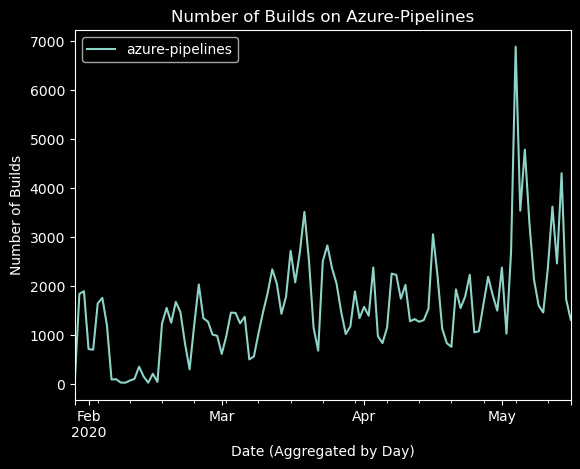

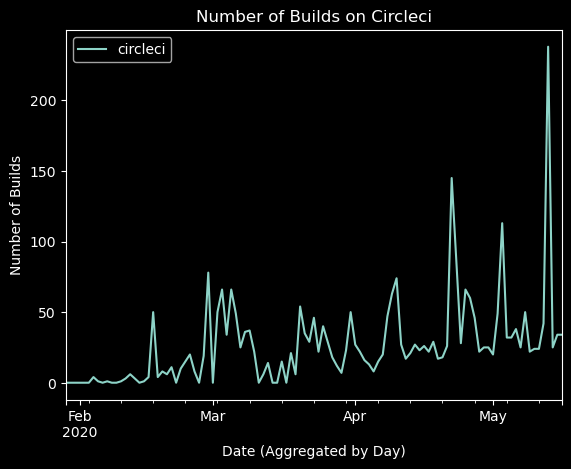

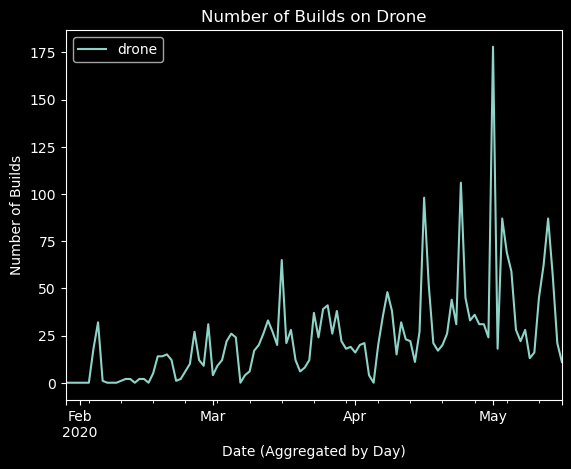

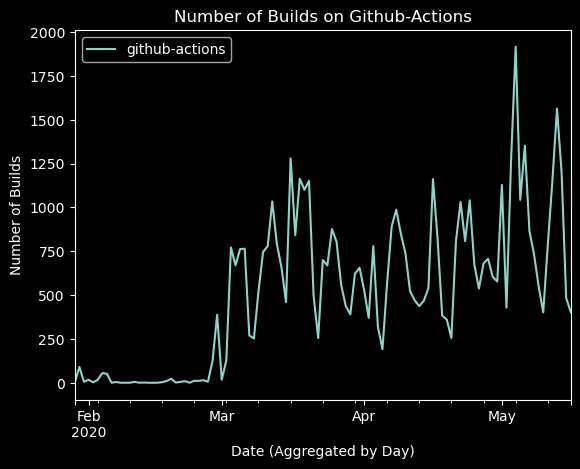

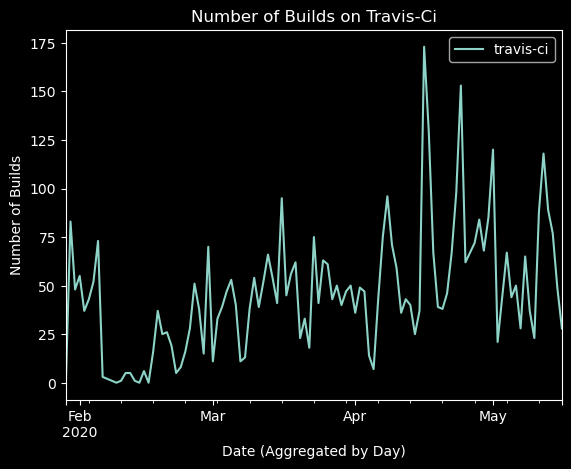

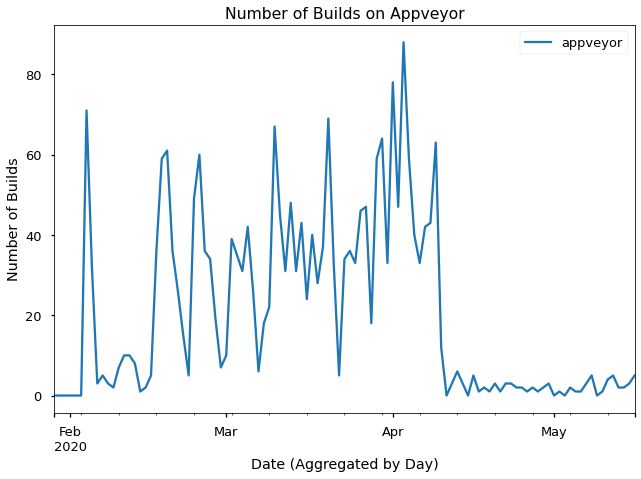

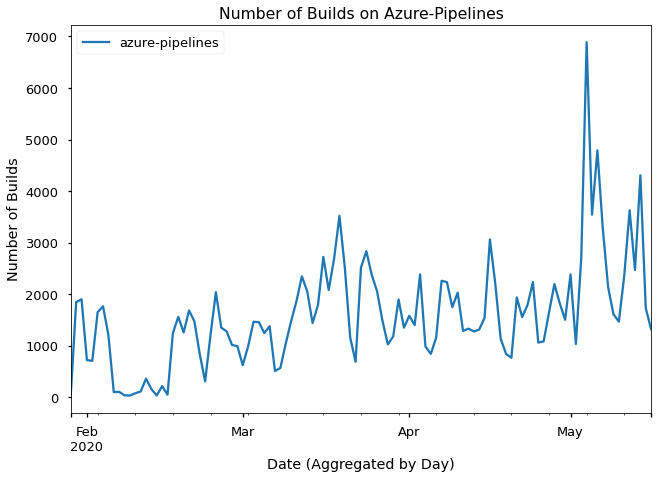

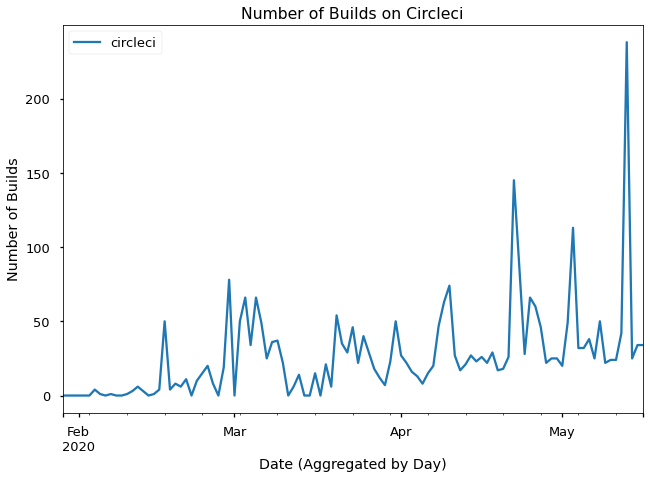

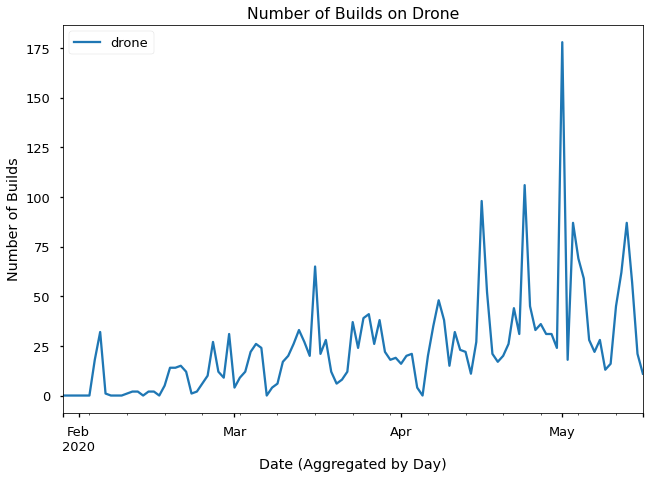

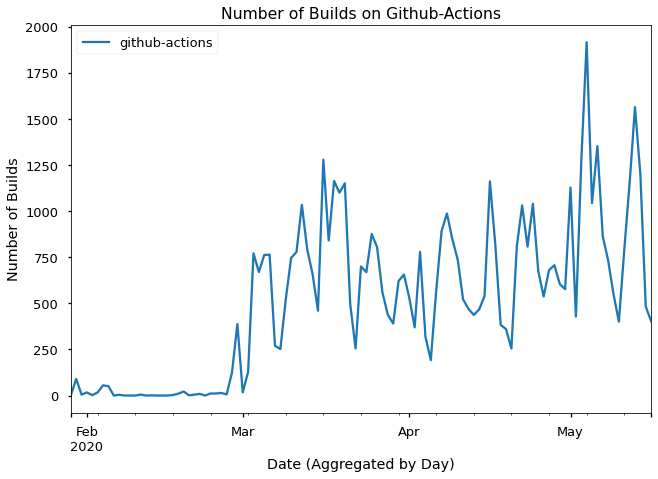

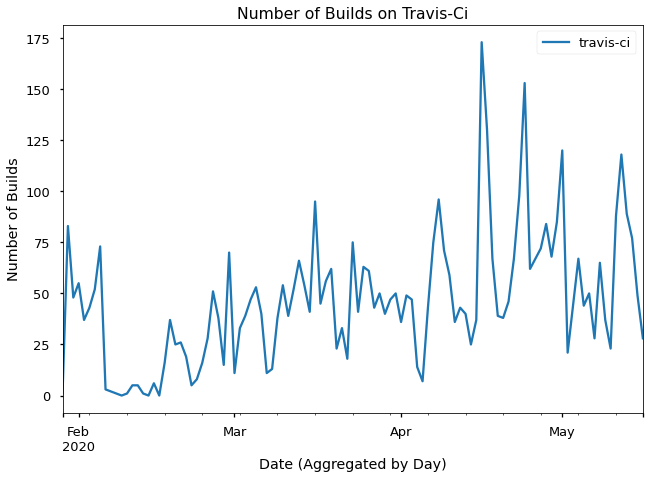

In [16]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        for k in df3.columns:
            fig, ax = plt.subplots()
            df3.plot(y=k, ax=ax)
            ax.set_title(f"Number of Builds on {k.title()}")
            ax.set_xlabel("Date (Aggregated by Day)")
            ax.set_ylabel("Number of Builds")
            fig.savefig(f"plots/builds_{k}-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)
    

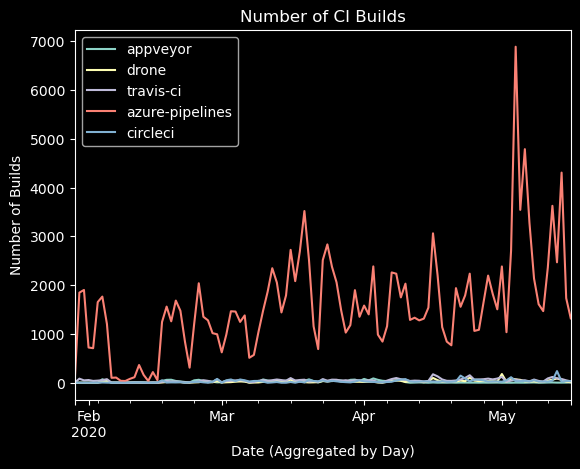

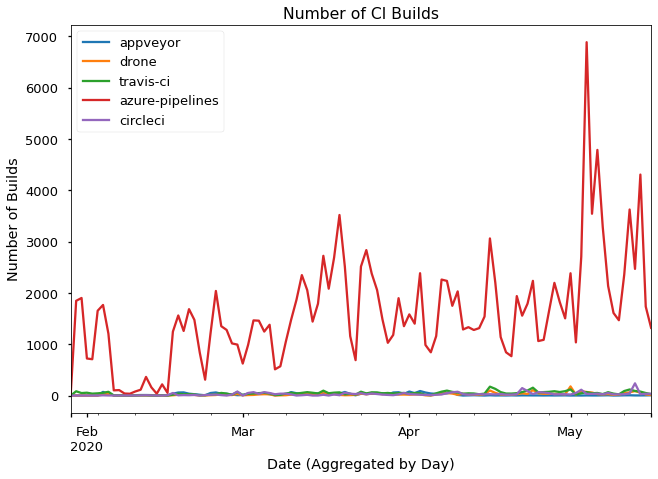

In [27]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3.plot(y=list(set(df3.columns) - {'github-actions'}), ax=ax)
        ax.set_title(f"Number of CI Builds")
        ax.set_xlabel("Date (Aggregated by Day)")
        ax.set_ylabel("Number of Builds")
        fig.savefig(f"plots/builds_combined-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)
    